## Nettoyage et filtres des données

Ce fichier contient l'import des données,  les filtres et le nettoyage des données

# Import pandas

In [1]:
import pandas as pd

# Import des données sources: tables entières

In [2]:
tmdb = pd.read_csv("./donnees/TMDB/tmdb_full.csv", low_memory=False)

In [3]:
# title_akas = pd.read_csv("./donnees/IMDb/title.akas.tsv/title.akas.tsv", sep="\t", low_memory=False)

In [4]:
title_basics = pd.read_csv("./donnees/IMDb/title.basics.tsv/title.basics.tsv", sep="\t", low_memory=False)

In [5]:
title_crew = pd.read_csv("./donnees/IMDb/title.crew.tsv/title.crew.tsv", sep="\t", low_memory=False)

In [6]:
# title_episode = pd.read_csv("./donnees/IMDb/title.episode.tsv/title.episode.tsv", sep="\t", low_memory=False)

In [7]:
title_principals = pd.read_csv("./donnees/IMDb/title.principals.tsv/title.principals.tsv", sep="\t", low_memory=False)

In [8]:
# title_ratings = pd.read_csv("./donnees/IMDb/title.ratings.tsv/title.ratings.tsv", sep="\t", low_memory=False)

In [9]:
name_basics = pd.read_csv("./donnees/IMDb/name.basics.tsv/name.basics.tsv", sep="\t", low_memory=False)

# Suite à l'étude de marché nous avons décidé de prendre les films français et les films d'action.

* Pour les films français, cela ne correspond pas à un genre alors nous avons choisi les films produits en France : production countries = FR
* Pour les films d'action, nous prenons les films qui contiennent Action dans les genres

Nous sommes parties de la table tmdb qui rassemble le plus d'informations dont nous avons besoin

In [10]:
tmdb_filtre = tmdb[(tmdb['genres'].str.contains('Action'))|(tmdb['production_countries'].str.contains('FR'))]

In [11]:
tmdb_filtre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45441 entries, 2 to 309568
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   adult                         45441 non-null  bool   
 1   backdrop_path                 28949 non-null  object 
 2   budget                        45441 non-null  int64  
 3   genres                        45441 non-null  object 
 4   homepage                      5801 non-null   object 
 5   id                            45441 non-null  int64  
 6   imdb_id                       45441 non-null  object 
 7   original_language             45441 non-null  object 
 8   original_title                45441 non-null  object 
 9   overview                      42712 non-null  object 
 10  popularity                    45441 non-null  float64
 11  poster_path                   42182 non-null  object 
 12  production_countries          45441 non-null  object 
 13  relea

# Fusion avec d'autres tables

Certaines informations dont nous avons besoin sont dans d'autres tables (title_crew, title_principals, names_basics). 

Nous allons donc fusionner notre table filtrée issues de tmdb avec ces tables

## Fusion avec title_crew

how = inner car on veut les films qui sont dans tmdb mais pour lesquels on a les directeurs et les writers qui sont dans title_crew

In [12]:
table_films_select = pd.merge(tmdb_filtre, 
                              title_crew,
                              how="inner", 
                              left_on = "imdb_id",
                              right_on = "tconst"
                              )

In [13]:
table_films_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45272 entries, 0 to 45271
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   adult                         45272 non-null  bool   
 1   backdrop_path                 28891 non-null  object 
 2   budget                        45272 non-null  int64  
 3   genres                        45272 non-null  object 
 4   homepage                      5773 non-null   object 
 5   id                            45272 non-null  int64  
 6   imdb_id                       45272 non-null  object 
 7   original_language             45272 non-null  object 
 8   original_title                45272 non-null  object 
 9   overview                      42562 non-null  object 
 10  popularity                    45272 non-null  float64
 11  poster_path                   42070 non-null  object 
 12  production_countries          45272 non-null  object 
 13  r

Nous avons décidé de ne pas garder les champs : 'backdrop_path','homepage','video','production_companies_name','production_companies_country'

In [14]:
table_films_select = table_films_select.drop(['backdrop_path','homepage','video','production_companies_name','production_companies_country'],axis=1)

## Fusion avec title_principals

how = inner car on veut conserver les films qui sont dans notre sélection précédente et qui sont dans la table title_principals. L'objectif est de pouvoir récupérer les acteurs.

In [15]:
table_films_select = pd.merge(table_films_select, 
                              title_principals,
                              how="inner", 
                              left_on = "tconst",
                              right_on = "tconst"
                              )

In [16]:
table_films_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770138 entries, 0 to 770137
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   adult                 770138 non-null  bool   
 1   budget                770138 non-null  int64  
 2   genres                770138 non-null  object 
 3   id                    770138 non-null  int64  
 4   imdb_id               770138 non-null  object 
 5   original_language     770138 non-null  object 
 6   original_title        770138 non-null  object 
 7   overview              732333 non-null  object 
 8   popularity            770138 non-null  float64
 9   poster_path           729572 non-null  object 
 10  production_countries  770138 non-null  object 
 11  release_date          762244 non-null  object 
 12  revenue               770138 non-null  int64  
 13  runtime               770138 non-null  int64  
 14  spoken_languages      770138 non-null  object 
 15  

Nous avons décidé de ne pas garder les champs : 'ordering','job'

In [17]:
table_films_select = table_films_select.drop(['ordering','job'],axis=1)

## Fusion avec name_basics

how = inner car on veut les films qui sont dans notre sélection précédente et dans la table name_basics. L'objectif est de pouvoir récupérer le nom des directeurs, auteurs, acteurs

In [18]:
table_films_select = pd.merge(table_films_select, 
                              name_basics,
                              how="inner", 
                              left_on = "nconst",
                              right_on = "nconst"
                              )

In [19]:
table_films_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770138 entries, 0 to 770137
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   adult                 770138 non-null  bool   
 1   budget                770138 non-null  int64  
 2   genres                770138 non-null  object 
 3   id                    770138 non-null  int64  
 4   imdb_id               770138 non-null  object 
 5   original_language     770138 non-null  object 
 6   original_title        770138 non-null  object 
 7   overview              732333 non-null  object 
 8   popularity            770138 non-null  float64
 9   poster_path           729572 non-null  object 
 10  production_countries  770138 non-null  object 
 11  release_date          762244 non-null  object 
 12  revenue               770138 non-null  int64  
 13  runtime               770138 non-null  int64  
 14  spoken_languages      770138 non-null  object 
 15  

Nous avons décidé de ne pas garder les champs : 'birthYear','deathYear','primaryProfession'

In [20]:
table_films_select = table_films_select.drop(['birthYear','deathYear','primaryProfession'],axis=1)

In [21]:
table_films_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770138 entries, 0 to 770137
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   adult                 770138 non-null  bool   
 1   budget                770138 non-null  int64  
 2   genres                770138 non-null  object 
 3   id                    770138 non-null  int64  
 4   imdb_id               770138 non-null  object 
 5   original_language     770138 non-null  object 
 6   original_title        770138 non-null  object 
 7   overview              732333 non-null  object 
 8   popularity            770138 non-null  float64
 9   poster_path           729572 non-null  object 
 10  production_countries  770138 non-null  object 
 11  release_date          762244 non-null  object 
 12  revenue               770138 non-null  int64  
 13  runtime               770138 non-null  int64  
 14  spoken_languages      770138 non-null  object 
 15  

## Fusion avec title_basics

how = inner car on veut les films qui sont dans notre sélection précédente et dans la table title_basics. L'objectif est de pouvoir récupérer le type

In [22]:
table_films_select = pd.merge(table_films_select,
                           title_basics,
                           how='left',
                           left_on='imdb_id',
                           right_on = 'tconst')

table_films_select

,adult,budget,genres_x,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,knownForTitles,tconst_y,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres_y
0,False,0,"['Drama', 'Romance']",8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,3.770,/aup2QCYCsyEeQfpboXy0f4uj8aE.jpg,...,"tt0053198,tt0099818,tt0060675,tt0065651",tt0055747,movie,Love at Twenty,L'amour à vingt ans,0,1962,\N,110,"Drama,Romance"
1,False,0,"['Drama', 'Romance']",8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,3.770,/aup2QCYCsyEeQfpboXy0f4uj8aE.jpg,...,"tt0072826,tt0078771,tt0082156,tt0074184",tt0055747,movie,Love at Twenty,L'amour à vingt ans,0,1962,\N,110,"Drama,Romance"
2,False,0,"['Drama', 'Romance']",8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,3.770,/aup2QCYCsyEeQfpboXy0f4uj8aE.jpg,...,"tt0053198,tt1180329,tt0055747,tt7371654",tt0055747,movie,Love at Twenty,L'amour à vingt ans,0,1962,\N,110,"Drama,Romance"
3,False,0,"['Drama', 'Romance']",8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,3.770,/aup2QCYCsyEeQfpboXy0f4uj8aE.jpg,...,"tt0167643,tt1180329,tt0055747,tt0122617",tt0055747,movie,Love at Twenty,L'amour à vingt ans,0,1962,\N,110,"Drama,Romance"
4,False,0,"['Drama', 'Romance']",8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,3.770,/aup2QCYCsyEeQfpboXy0f4uj8aE.jpg,...,"tt1369743,tt0275822,tt0268795,tt1063369",tt0055747,movie,Love at Twenty,L'amour à vingt ans,0,1962,\N,110,"Drama,Romance"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770133,False,0,"['Action', 'War']",918692,tt17352384,ru,Гранит,Mozambique requests from Russia is being helpe...,1.238,/nqMk6TIUwqSMRc6QPKYguNr9Ql0.jpg,...,"tt15251228,tt15237914,tt16402682,tt17066696",tt17352384,movie,Granit,Granit,0,2021,\N,100,Action
770134,False,0,"['Action', 'War']",918692,tt17352384,ru,Гранит,Mozambique requests from Russia is being helpe...,1.238,/nqMk6TIUwqSMRc6QPKYguNr9Ql0.jpg,...,"tt15237914,tt16402682,tt17066696,tt17352384",tt17352384,movie,Granit,Granit,0,2021,\N,100,Action
770135,False,0,"['Action', 'War']",918692,tt17352384,ru,Гранит,Mozambique requests from Russia is being helpe...,1.238,/nqMk6TIUwqSMRc6QPKYguNr9Ql0.jpg,...,"tt4553722,tt11871384,tt15237914,tt16402682",tt17352384,movie,Granit,Granit,0,2021,\N,100,Action
770136,False,0,"['Action', 'War']",918692,tt17352384,ru,Гранит,Mozambique requests from Russia is being helpe...,1.238,/nqMk6TIUwqSMRc6QPKYguNr9Ql0.jpg,...,"tt3725432,tt15237914,tt17352384,tt21191770",tt17352384,movie,Granit,Granit,0,2021,\N,100,Action


On sélectionne les titres de type movie

In [23]:
table_films_select = table_films_select[table_films_select['titleType'] == 'movie']

In [24]:
table_films_select.columns

Index(['adult', 'budget', 'genres_x', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tconst_x', 'directors', 'writers', 'nconst', 'category',
       'characters', 'primaryName', 'knownForTitles', 'tconst_y', 'titleType',
       'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear',
       'runtimeMinutes', 'genres_y'],
      dtype='object')

In [25]:
table_films_select = table_films_select.drop(['tconst_y','primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear',
       'runtimeMinutes', 'genres_y','titleType','tconst_x'], axis=1)

In [26]:
table_films_select = table_films_select.rename(columns={'genres_x':'genres'})

In [27]:
table_films_select.columns

Index(['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'directors', 'writers', 'nconst', 'category',
       'characters', 'primaryName', 'knownForTitles'],
      dtype='object')

On regarde les genres, on voit qu'il existe TV Movies, on décide de les exclure

In [28]:
table_films_select = table_films_select[table_films_select['genres'].str.contains('TV Movie')==False]

In [29]:
table_films_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 626807 entries, 0 to 770137
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   adult                 626807 non-null  bool   
 1   budget                626807 non-null  int64  
 2   genres                626807 non-null  object 
 3   id                    626807 non-null  int64  
 4   imdb_id               626807 non-null  object 
 5   original_language     626807 non-null  object 
 6   original_title        626807 non-null  object 
 7   overview              605385 non-null  object 
 8   popularity            626807 non-null  float64
 9   poster_path           601165 non-null  object 
 10  production_countries  626807 non-null  object 
 11  release_date          620602 non-null  object 
 12  revenue               626807 non-null  int64  
 13  runtime               626807 non-null  int64  
 14  spoken_languages      626807 non-null  object 
 15  statu

# Export de la sélection pour ne pas avoir besoin de réimporter toutes les tables à chaque lancement

In [30]:
table_films_select.to_csv('./donnees/table_films_select.csv', sep="\t", index=False)

# On part du csv créé table_films_select.csv

In [31]:
films_tmdb_imdb = pd.read_csv("./donnees/table_films_select.csv", sep="\t", low_memory=False)

## on regarde le contenu de notre table avec info et describe

In [32]:
films_tmdb_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626807 entries, 0 to 626806
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   adult                 626807 non-null  bool   
 1   budget                626807 non-null  int64  
 2   genres                626807 non-null  object 
 3   id                    626807 non-null  int64  
 4   imdb_id               626807 non-null  object 
 5   original_language     626807 non-null  object 
 6   original_title        626807 non-null  object 
 7   overview              605385 non-null  object 
 8   popularity            626807 non-null  float64
 9   poster_path           601165 non-null  object 
 10  production_countries  626807 non-null  object 
 11  release_date          620602 non-null  object 
 12  revenue               626807 non-null  int64  
 13  runtime               626807 non-null  int64  
 14  spoken_languages      626807 non-null  object 
 15  

In [33]:
films_tmdb_imdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,6.268070e+05,6.268070e+05,626807.000000,6.268070e+05,626807.000000,626807.000000,626807.000000
mean,4.592321e+06,2.793050e+05,6.921072,1.154845e+07,96.242971,5.042463,268.881571
std,2.187168e+07,2.755366e+05,52.616728,7.973241e+07,62.993622,2.316040,1373.509270
min,0.000000e+00,6.000000e+00,0.600000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,5.948400e+04,1.081000,0.000000e+00,87.000000,4.400000,2.000000
50%,0.000000e+00,1.820300e+05,2.020000,0.000000e+00,95.000000,5.700000,9.000000
75%,0.000000e+00,4.375430e+05,5.496000,0.000000e+00,109.000000,6.500000,50.000000
max,5.793304e+08,1.122061e+06,4665.438000,2.923706e+09,12480.000000,10.000000,33630.000000


La colonne release_date n'est pas au format date donc on la transforme

In [34]:
films_tmdb_imdb['release_date']=pd.to_datetime(films_tmdb_imdb['release_date'])

In [35]:
films_tmdb_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626807 entries, 0 to 626806
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 626807 non-null  bool          
 1   budget                626807 non-null  int64         
 2   genres                626807 non-null  object        
 3   id                    626807 non-null  int64         
 4   imdb_id               626807 non-null  object        
 5   original_language     626807 non-null  object        
 6   original_title        626807 non-null  object        
 7   overview              605385 non-null  object        
 8   popularity            626807 non-null  float64       
 9   poster_path           601165 non-null  object        
 10  production_countries  626807 non-null  object        
 11  release_date          620602 non-null  datetime64[ns]
 12  revenue               626807 non-null  int64         
 13 

Il y a rarement l'info tagline donc on drop la colonne

In [36]:
films_tmdb_imdb = films_tmdb_imdb.drop('tagline', axis=1)

On ne garde que les films qui ont un résumé car on veut l'afficher

In [37]:
films_tmdb_imdb.dropna(subset = ['overview'], inplace=True)

In [38]:
films_tmdb_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 605385 entries, 0 to 626806
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 605385 non-null  bool          
 1   budget                605385 non-null  int64         
 2   genres                605385 non-null  object        
 3   id                    605385 non-null  int64         
 4   imdb_id               605385 non-null  object        
 5   original_language     605385 non-null  object        
 6   original_title        605385 non-null  object        
 7   overview              605385 non-null  object        
 8   popularity            605385 non-null  float64       
 9   poster_path           582468 non-null  object        
 10  production_countries  605385 non-null  object        
 11  release_date          600263 non-null  datetime64[ns]
 12  revenue               605385 non-null  int64         
 13  runt

On ne garde que les films qui ont un poster car on veut l'afficher

In [39]:
films_tmdb_imdb.dropna(subset = ['poster_path'], inplace=True)

In [40]:
films_tmdb_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582468 entries, 0 to 626806
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 582468 non-null  bool          
 1   budget                582468 non-null  int64         
 2   genres                582468 non-null  object        
 3   id                    582468 non-null  int64         
 4   imdb_id               582468 non-null  object        
 5   original_language     582468 non-null  object        
 6   original_title        582468 non-null  object        
 7   overview              582468 non-null  object        
 8   popularity            582468 non-null  float64       
 9   poster_path           582468 non-null  object        
 10  production_countries  582468 non-null  object        
 11  release_date          579897 non-null  datetime64[ns]
 12  revenue               582468 non-null  int64         
 13  runt

On regarde quelles sont les colonnes restantes qui ont des valeurs nulles et on supprime les lignes ayant des valeurs nulles

In [41]:
films_tmdb_imdb.isna().sum()

adult                      0
budget                     0
genres                     0
id                         0
imdb_id                    0
original_language          0
original_title             0
overview                   0
popularity                 0
poster_path                0
production_countries       0
release_date            2571
revenue                    0
runtime                    0
spoken_languages           0
status                     0
title                      0
vote_average               0
vote_count                 0
directors                  0
writers                    0
nconst                     0
category                   0
characters                 0
primaryName                0
knownForTitles             0
dtype: int64

In [42]:
films_tmdb_imdb.dropna(subset = ['release_date'], inplace=True)

In [43]:
films_tmdb_imdb.isna().sum()

adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
directors               0
writers                 0
nconst                  0
category                0
characters              0
primaryName             0
knownForTitles          0
dtype: int64

On renomme id  en id_tmdb pour clarifier

In [44]:
films_tmdb_imdb = films_tmdb_imdb.rename(columns={'id':'id_tmdb'})

on regarde le vote average et la popularity. Les 2 ne vont pas toujours dans le même sens, un film bien noté peut ne pas être populaire et inversement

On choisit de faire un filtre sur le vote_average

In [45]:
films_tmdb_imdb[['vote_average','popularity']].value_counts(sort=True)


vote_average  popularity
0.000         0.600         17957
              0.840          2846
              1.400          2802
5.000         0.600          2586
6.000         0.600          2245
                            ...  
6.833         1.282             1
6.045         0.686             1
7.000         0.976             1
4.000         0.728             1
6.400         1.662             1
Name: count, Length: 24613, dtype: int64

On cherche le max de vote_average : il est de 10 on en déduit que les films sont notés sur 10

In [46]:
films_tmdb_imdb['vote_average'].max()

10.0

on prend les films avec vote_average supérieur à 5

In [47]:
films_tmdb_imdb_sup5 = films_tmdb_imdb[films_tmdb_imdb['vote_average']>5]

In [48]:
films_tmdb_imdb_sup5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390841 entries, 0 to 626664
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 390841 non-null  bool          
 1   budget                390841 non-null  int64         
 2   genres                390841 non-null  object        
 3   id_tmdb               390841 non-null  int64         
 4   imdb_id               390841 non-null  object        
 5   original_language     390841 non-null  object        
 6   original_title        390841 non-null  object        
 7   overview              390841 non-null  object        
 8   popularity            390841 non-null  float64       
 9   poster_path           390841 non-null  object        
 10  production_countries  390841 non-null  object        
 11  release_date          390841 non-null  datetime64[ns]
 12  revenue               390841 non-null  int64         
 13  runt

On filtre selon date de sortie pour cela on ajoute une colonne year qui contient l'année de sortie et on prend les films à partir de 2000.

In [49]:
from datetime import datetime

on ajoute une colonne année

In [50]:
films_tmdb_imdb_sup5['year'] = films_tmdb_imdb_sup5['release_date'].dt.year

C:\Users\LOTUS\AppData\Local\Temp\ipykernel_17744\2621779178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films_tmdb_imdb_sup5['year'] = films_tmdb_imdb_sup5['release_date'].dt.year


In [51]:
films_tmdb_imdb_sup5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390841 entries, 0 to 626664
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 390841 non-null  bool          
 1   budget                390841 non-null  int64         
 2   genres                390841 non-null  object        
 3   id_tmdb               390841 non-null  int64         
 4   imdb_id               390841 non-null  object        
 5   original_language     390841 non-null  object        
 6   original_title        390841 non-null  object        
 7   overview              390841 non-null  object        
 8   popularity            390841 non-null  float64       
 9   poster_path           390841 non-null  object        
 10  production_countries  390841 non-null  object        
 11  release_date          390841 non-null  datetime64[ns]
 12  revenue               390841 non-null  int64         
 13  runt

In [52]:
films_tmdb_imdb_sup5['year'].value_counts(sort=True)

year
2017    14731
2019    14032
2022    13847
2018    13655
2016    12988
        ...  
1914       39
1917       36
1915       26
1906       20
1903        4
Name: count, Length: 113, dtype: int64

On va garder les années après 2000 inclus

In [53]:
films_tmdb_imdb_sup5_2000 = films_tmdb_imdb_sup5[films_tmdb_imdb_sup5['year']> 1999]

In [54]:
films_tmdb_imdb_sup5_2000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222022 entries, 70 to 626664
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 222022 non-null  bool          
 1   budget                222022 non-null  int64         
 2   genres                222022 non-null  object        
 3   id_tmdb               222022 non-null  int64         
 4   imdb_id               222022 non-null  object        
 5   original_language     222022 non-null  object        
 6   original_title        222022 non-null  object        
 7   overview              222022 non-null  object        
 8   popularity            222022 non-null  float64       
 9   poster_path           222022 non-null  object        
 10  production_countries  222022 non-null  object        
 11  release_date          222022 non-null  datetime64[ns]
 12  revenue               222022 non-null  int64         
 13  run

Nombre de films sélectionnés jusqu'à cette étape: 

In [55]:
len(films_tmdb_imdb_sup5_2000['id_tmdb'].unique())

11329

On regarde la durée des films puis on choisit de ne conserver que les films de plus de 60 min. 

In [56]:
liste = list(films_tmdb_imdb_sup5_2000['runtime'].unique())
liste.sort()
liste

[0,
 2,
 12,
 40,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 195,
 196,
 201,
 205,
 208,
 210,
 218,
 219,
 222,
 225,
 226,
 227,
 237,
 242,
 247,
 255,
 270,
 278,
 280,
 296,
 345,
 495]

on prend les films plus longs que 60 minutes

In [57]:
films_tmdb_imdb_sup5_2000_60 = films_tmdb_imdb_sup5_2000[films_tmdb_imdb_sup5_2000['runtime']>=60]

In [58]:
films_tmdb_imdb_sup5_2000_60.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216752 entries, 70 to 626664
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 216752 non-null  bool          
 1   budget                216752 non-null  int64         
 2   genres                216752 non-null  object        
 3   id_tmdb               216752 non-null  int64         
 4   imdb_id               216752 non-null  object        
 5   original_language     216752 non-null  object        
 6   original_title        216752 non-null  object        
 7   overview              216752 non-null  object        
 8   popularity            216752 non-null  float64       
 9   poster_path           216752 non-null  object        
 10  production_countries  216752 non-null  object        
 11  release_date          216752 non-null  datetime64[ns]
 12  revenue               216752 non-null  int64         
 13  run

Nombre de films qui durent plus de 60 minutes inclues sortis à partir de 2000 et qui ont une note supérieure à 5.

In [59]:
len(films_tmdb_imdb_sup5_2000_60['id_tmdb'].unique())

10994

On regarde le statut des films on veut conserver Released et enlèver les films In Production => en fait il n'y a pas de films en production

In [60]:
films_tmdb_imdb_sup5_2000_60_released = films_tmdb_imdb_sup5_2000_60[films_tmdb_imdb_sup5_2000_60['status'] == 'Released']

In [61]:
films_tmdb_imdb_sup5_2000_60_released.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216752 entries, 70 to 626664
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 216752 non-null  bool          
 1   budget                216752 non-null  int64         
 2   genres                216752 non-null  object        
 3   id_tmdb               216752 non-null  int64         
 4   imdb_id               216752 non-null  object        
 5   original_language     216752 non-null  object        
 6   original_title        216752 non-null  object        
 7   overview              216752 non-null  object        
 8   popularity            216752 non-null  float64       
 9   poster_path           216752 non-null  object        
 10  production_countries  216752 non-null  object        
 11  release_date          216752 non-null  datetime64[ns]
 12  revenue               216752 non-null  int64         
 13  run

In [62]:
len(films_tmdb_imdb_sup5_2000_60_released['original_title'].unique())


10907

In [63]:
len(films_tmdb_imdb_sup5_2000_60_released['imdb_id'].unique())

10994

On regarde si les original_title apparaissent plusieurs fois = OUI => mais c'est normal soit plusieurs films avec même titre soit plusieurs acteurs...

# On créer un DataFrame avec les informations ne consernant que les films (pas les acteurs ... pour avoir une ligne par film)

on sélectionne les colonnes puis on enlève les doublons

In [64]:
films_select = films_tmdb_imdb_sup5_2000_60_released[['adult','budget','genres','id_tmdb','imdb_id','original_language','original_title','original_title','overview','popularity','poster_path','production_countries','release_date' ,'revenue','runtime','spoken_languages','status','title' ,'vote_average','vote_count','directors','writers','year'                        
                        
                        ]]


In [65]:
films_select.duplicated().sum()

205758

In [66]:
films_select = films_select.drop_duplicates()

In [67]:
films_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10994 entries, 70 to 626653
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 10994 non-null  bool          
 1   budget                10994 non-null  int64         
 2   genres                10994 non-null  object        
 3   id_tmdb               10994 non-null  int64         
 4   imdb_id               10994 non-null  object        
 5   original_language     10994 non-null  object        
 6   original_title        10994 non-null  object        
 7   original_title        10994 non-null  object        
 8   overview              10994 non-null  object        
 9   popularity            10994 non-null  float64       
 10  poster_path           10994 non-null  object        
 11  production_countries  10994 non-null  object        
 12  release_date          10994 non-null  datetime64[ns]
 13  revenue            

Dans le DataFrame complet on ne garde que les lignes dont la category de personnes est actor, actress. Pour director et writer on les a déjà et le reste ne nous sera pas utile

In [68]:
films_tmdb_imdb_sup5_2000_60_released_acteur = films_tmdb_imdb_sup5_2000_60_released[(films_tmdb_imdb_sup5_2000_60_released['category'] =='actor')|(films_tmdb_imdb_sup5_2000_60_released['category'] =='actress')]

In [69]:
films_tmdb_imdb_sup5_2000_60_released_acteur.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104636 entries, 70 to 626655
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 104636 non-null  bool          
 1   budget                104636 non-null  int64         
 2   genres                104636 non-null  object        
 3   id_tmdb               104636 non-null  int64         
 4   imdb_id               104636 non-null  object        
 5   original_language     104636 non-null  object        
 6   original_title        104636 non-null  object        
 7   overview              104636 non-null  object        
 8   popularity            104636 non-null  float64       
 9   poster_path           104636 non-null  object        
 10  production_countries  104636 non-null  object        
 11  release_date          104636 non-null  datetime64[ns]
 12  revenue               104636 non-null  int64         
 13  run

On export les DataFrames de films sans les acteurs et avec les acteurs

In [99]:
films_select.to_csv('./donnees/films_selectionnes.csv', sep="\t", index=False)

In [100]:
films_tmdb_imdb_sup5_2000_60_released_acteur.to_csv('./donnees/films_selectionnes_avec_acteurs.csv', sep="\t", index=False)

J'importe le csv des films que nous avons exportés = films_selectionnes

In [101]:
films = pd.read_csv("./donnees/films_selectionnes.csv", sep="\t", low_memory=False)

J'importe le fichier contenant les films et les acteurs

In [102]:
films_acteurs = pd.read_csv('./donnees/films_selectionnes_avec_acteurs.csv', sep="\t")

>On vérifie l'année de sortie max pour être sur qu'il n'y a pas de valeurs aberrantes ex futur

In [87]:
max_year = films['year'].max()
max_year

2023

In [88]:
import seaborn as sns

On vérifie les budgets : il y a beaucoup de valeurs à 0, on suppose que cela signifie que l'info n'est pas dispo. On les enlèvera pour les stat mais on garde dans la liste de films

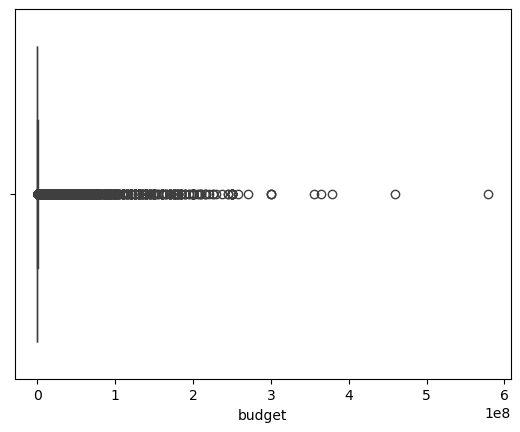

In [98]:
sns.boxplot(films, x='budget');

On regarde le revenue il y a également bcp de 0. On les enlèvera pour les stat mais on garde dans la liste de films

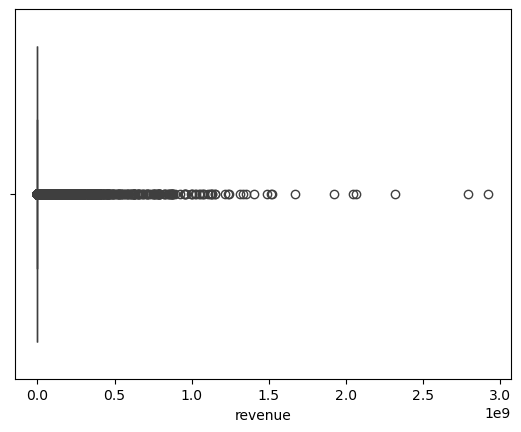

In [90]:
sns.boxplot(films, x='revenue');

On vérifie la durée des films : il y en a des longs mais c'est plausible : un très long documentaire

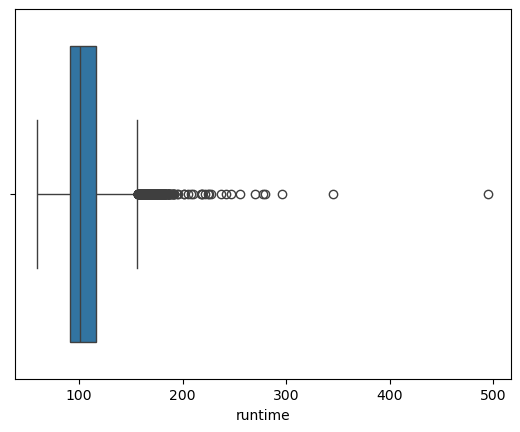

In [91]:
sns.boxplot(films, x='runtime');

In [92]:
films['runtime'].max()

495

On regarde la moyenne des votes: il y a bien quelques films qui se démarquent mais ça reste < 10 donc c'est plausible

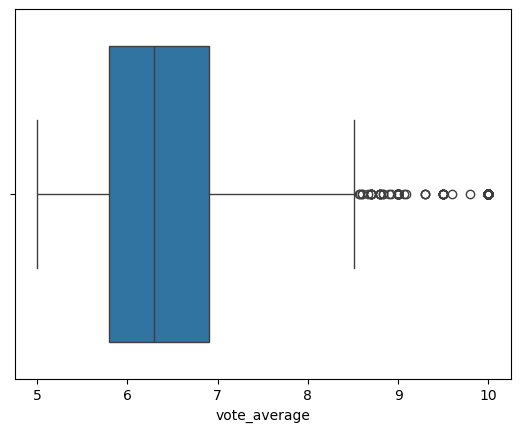

In [94]:
sns.boxplot(films, x='vote_average');

on regarde le nombre de vote : pas interprétable

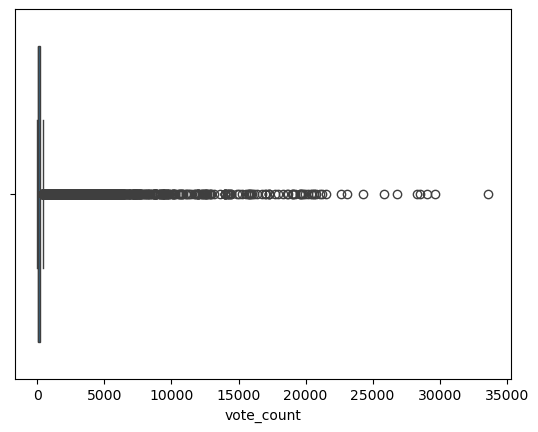

In [95]:
sns.boxplot(films, x='vote_count');